In [398]:
library(data.table)
library(ggplot2)
library(latex2exp)


In [399]:
time <- 500

In [400]:
N_AGENTS <- 12625

In [401]:
mypath <- "../../log/ProvaEmailcontacts-act-1"

In [402]:
#mypath <- "/home/nik/ProvaEmailcontacts2.5/ProvaEmailcontacts2.5"

In [403]:
list.dirs <- function(path=".", pattern=NULL, all.dirs=FALSE,
  full.names=FALSE, ignore.case=FALSE) {
  # use full.names=TRUE to pass to file.info
  all <- list.files(path, pattern, all.dirs,
           full.names=TRUE, recursive=FALSE, ignore.case)
  dirs <- all[file.info(all)$isdir]
  # determine whether to return full names or just dir names
  if(isTRUE(full.names))
    return(dirs)
  else
    return(basename(dirs))
}

In [404]:
thepath = list.dirs(mypath)[1]

In [405]:
filename = paste(mypath, '/', thepath, '/', 'k_core.csv', sep = "")

In [406]:
DF <- read.csv(file = filename, skip=12)

In [407]:
tempDF <- DF[DF$state =='i',]
tempDF <- tempDF[tempDF$time == 1,]

In [408]:
tempDF

,time,agent,k.core,state,degree
6326,1,6325,1,i,1


In [409]:
agent <- as.integer(tempDF['agent'])
kcore <- as.integer(tempDF['k.core'])

In [410]:
DF$'agent.init' <- agent
DF$'k.core.init' <- kcore
DF$'density' <- 1

In [411]:
DT <- data.table(DF)

In [412]:
DT1 = DT[, sum(density), by=list(time, state)]

In [413]:
names(DT1)[names(DT1)=="V1"] <- "density"

In [414]:
DT1$density <- DT1$density / N_AGENTS

In [415]:
DT1$'agent.init' <- agent
DT1$'k.core.init' <- kcore

In [416]:
tempDT1 <- DT1[DT1$state == 'r']
tempDT1 <- tempDT1[tempDT1$time == 500]
density <- as.numeric(tempDT1[,'density'])

In [417]:
DT1 = DT1[DT1$state == 'r']
DT1[,state:=NULL]

## All datasets

Assemble everything and do the loops

In [418]:
emptytable <- data.table()
lista = list.dirs(mypath)
for (i in lista){    
    filename = paste(mypath, '/', i, '/', 'k_core.csv', sep = "")
    print(filename)
    DF <- read.csv(file = filename, skip=12)
    tempDF <- DF[DF$state =='i',]
    tempDF <- tempDF[tempDF$time == 1,]

    agent <- as.integer(tempDF['agent'])
    kcore <- as.integer(tempDF['k.core'])

    DF$'agent.init' <- agent
    DF$'k.core.init' <- kcore
    DF$'density' <- 1
    DF$'density.mean' <- 1
    DF$'density.std' <- 1

    DT <- data.table(DF)
    DT1 = DT[, sum(density), by=list(time, state)]
    
    names(DT1)[names(DT1)=="V1"] <- "density"

    DT1$density <- DT1$density / N_AGENTS

    DT1$'agent.init' <- agent
    DT1$'k.core.init' <- kcore
    
    tempDT1 <- DT1[DT1$state == 'r']
    tempDT1 <- tempDT1[tempDT1$time == 500]
    density <- as.numeric(tempDT1[,'density'])
    
    DT1 = DT1[DT1$state == 'r']
    DT1[,state:=NULL]
    #print(DT1)
    emptytable <- rbind(emptytable, DT1)
}

[1] "../../log/ProvaEmailcontacts-act-1/2019_01_03_18_11_04/k_core.csv"
[1] "../../log/ProvaEmailcontacts-act-1/2019_01_03_18_11_11/k_core.csv"
[1] "../../log/ProvaEmailcontacts-act-1/2019_01_03_18_29_57/k_core.csv"
[1] "../../log/ProvaEmailcontacts-act-1/2019_01_03_18_30_09/k_core.csv"
[1] "../../log/ProvaEmailcontacts-act-1/2019_01_03_18_49_54/k_core.csv"
[1] "../../log/ProvaEmailcontacts-act-1/2019_01_03_18_50_07/k_core.csv"
[1] "../../log/ProvaEmailcontacts-act-1/2019_01_03_19_08_36/k_core.csv"
[1] "../../log/ProvaEmailcontacts-act-1/2019_01_03_19_09_26/k_core.csv"
[1] "../../log/ProvaEmailcontacts-act-1/2019_01_03_19_27_52/k_core.csv"
[1] "../../log/ProvaEmailcontacts-act-1/2019_01_03_19_28_53/k_core.csv"
[1] "../../log/ProvaEmailcontacts-act-1/2019_01_03_19_47_16/k_core.csv"
[1] "../../log/ProvaEmailcontacts-act-1/2019_01_03_19_48_07/k_core.csv"
[1] "../../log/ProvaEmailcontacts-act-1/2019_01_03_20_06_54/k_core.csv"
[1] "../../log/ProvaEmailcontacts-act-1/2019_01_03_20_07_30/k_co

In [419]:
rawtable <- emptytable

Compute mean and standard deviation and add to data table

In [420]:
emptytable <- rawtable

In [421]:
emptytabletime <- emptytable[emptytable$time == 500]
#emptytabletime <- emptytabletime[emptytabletime$density < 0.46]
#emptytabletime <- emptytabletime[emptytabletime$density > 0.05]
#emptytabletime$k.core.init <- emptytabletime$k.core.init + 1 + emptytabletime$k.core.init %% 2 
toplot <- emptytabletime[, mean(density), by=list(time, k.core.init)][,'k.core.init']
toplot$mean <- emptytabletime[emptytabletime$time == 500][, mean(density), by=list(time, k.core.init)][,'V1']
toplot$std <- emptytabletime[emptytabletime$time == 500][, sd(density), by=list(time, k.core.init)][,'V1']

Clean NaN values

In [422]:
toplot[is.na(toplot)] <- 0

In [423]:
toplot

k.core.init,mean,std
1,0.0320000000000,0.011053786269705
23,0.0428514851485,0.002912439811620
2,0.0435247524752,0.006328955744482
22,0.0428514851485,0.005376811959914
21,0.0388514851485,0.002184329858715
3,0.0394851485149,0.000392059205410
20,0.0434851485149,0.000560084579158
4,0.0382178217822,0.009689463219428
5,0.0384158415842,0.008513285603196
18,0.0387722772277,0.006665006491976


Plot

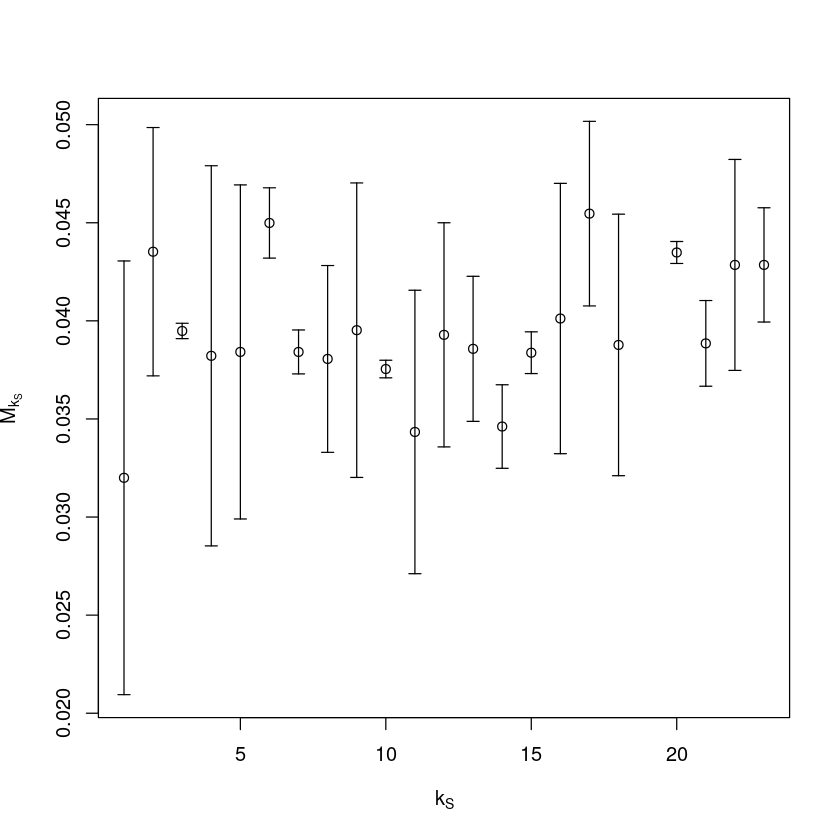

In [424]:
plot(toplot$k.core.init, toplot$mean,
    ylim=range(c(toplot$mean-toplot$std, toplot$mean+toplot$std)),
     #log='y',
     xlab=TeX('$k_S$'), ylab=TeX('$M_{k_S}$'),
    #main="Scatter plot with std.dev error bars"
)
arrows(toplot$k.core.init, toplot$mean-toplot$std, 
       toplot$k.core.init, toplot$mean+toplot$std, length=0.05, angle=90, code=3)


Log y plot

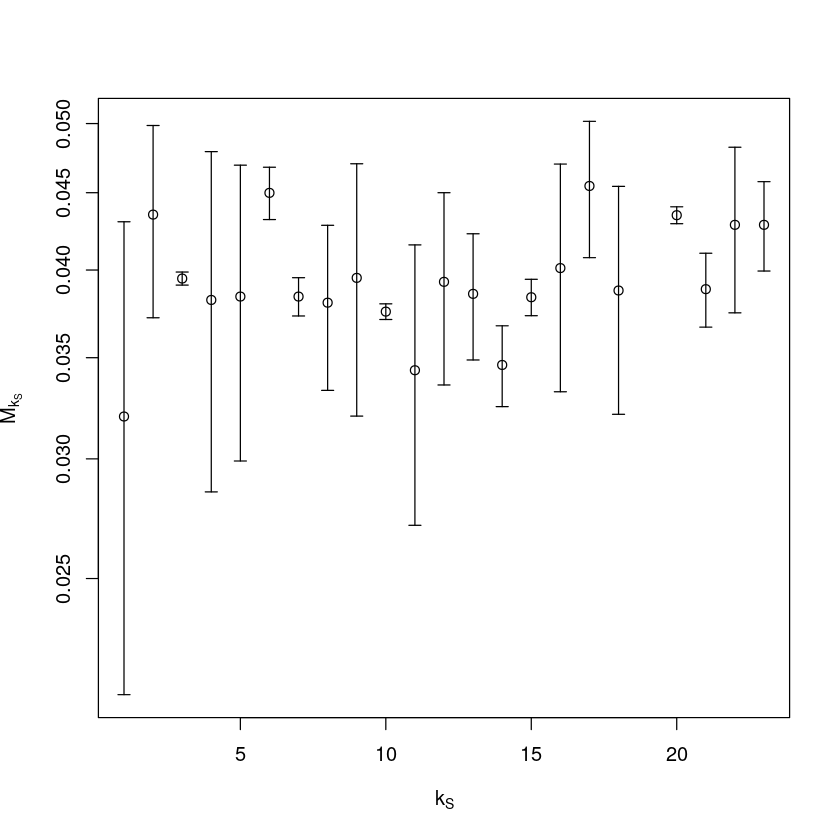

In [425]:
plot(toplot$k.core.init, toplot$mean,
     ylim=range(c(toplot$mean-toplot$std, toplot$mean+toplot$std)),
     log='y',
     xlab=TeX('$k_S$'), ylab=TeX('$M_{k_S}$'),
    #main="Scatter plot with std.dev error bars"
)
arrows(toplot$k.core.init, toplot$mean-toplot$std, 
       toplot$k.core.init, toplot$mean+toplot$std, length=0.05, angle=90, code=3)